<a href="https://colab.research.google.com/github/Loelama36/Project_1_Computing_Errors/blob/main/Group_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Module 2

1) Estimate Derivatives

In [ ]:
import math

def true_error(trueVal, measuredVal):                                             #defines the true error
  return trueVal - measuredVal


def relative_error(trueVal, measuredVal):                                         #defines the relative error
  trueError = trueVal - measuredVal
  return trueError/ measuredVal                                      

def approximate_error(previousMeasured, currentMeasured):
  return currentMeasured - previousMeasured

def approximate_relative_error(previousMeasured, currentMeasured):
  approximateError = currentMeasured - previousMeasured
  return approximateError/currentMeasured

def forwardDiff (function,initial,increment):                                           #defines the forward difference
  forwardDif=(function(initial+increment)-function(initial))/increment
  return forwardDif

def backwardDiff (function,initial,increment):                                          #defines the backward Difference
  backwardDiff=(function(initial)-function(initial-increment))/increment
  return backwardDiff

def centralDiff(function,initial,increment):                                            #defines the central difference
  centralDiff=(function(initial+increment)-function(initial-increment))/(2*increment)
  return centralDiff

def finiteDiff(function,initial,increment):                                                                       
  finiteDiff=(function(initial+2*increment)-2*function(initial+increment)+function(initial))/(increment)**2
  return finiteDiff

**Derivative Function**

The Derivatice functions that we have used are as follows:-  
Forward difference is given by $$
f'(x_0)\approx \frac{f(x_0+\Delta x)-f(x_0)}{\Delta x}
$$

The backward difference is given by $$
f'(x_0)\approx \frac{f(x_0)-f(x_0-\Delta x)}{\Delta x}
$$
The central difference is given by $$
f'(x_0)\approx \frac{f(x_0+\Delta x)-f(x_0-\Delta x)}{2\Delta x}
$$

We have also used the finite difference which is given by the formula $$
            f''(x_0)\approx \frac{f(x_0+2\Delta x)-2f(x_0+\Delta x)+f(x_0)}{\left(\Delta x\right)^2}
$$







In [ ]:
increment = [1, .1 , .01 , .001,.0001]
pi = math.pi
forwardD = [forwardDiff(math.cos, pi/4,step) for step in increment]
backwardD = [backwardDiff(math.cos, pi/4,step) for step in increment]
centralD = [centralDiff(math.cos, pi/4,step) for step in increment]
finiteD = [finiteDiff(math.cos, pi/4,step) for step in increment]

sqrt2 = math.sqrt(2)
actualFirst = 1/sqrt2

absoluteforward = [true_error(estimate,actualFirst) for estimate in forwardD]
relativeforward = [relative_error(estimate, actualFirst) for estimate in forwardD]

absolutebackward = [true_error(estimate,actualFirst) for estimate in backwardD]
relativebackward = [relative_error(estimate, actualFirst) for estimate in backwardD]

absolutecentral = [true_error(estimate,actualFirst) for estimate in centralD]
relativecentral = [relative_error(estimate, actualFirst) for estimate in centralD]

actualSecond = -1/sqrt2 

absolutefinite = [true_error(estimate,actualSecond) for estimate in finiteD]
relativefinite = [relative_error(estimate, actualSecond) for estimate in finiteD]

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=4, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}],
           [{"type": "table"}],
           [{"type": "table"}],
           [{"type": "table"}]]
)


fig.add_trace(go.Table(
                header=dict(values=['Step Size', 'Forward Estimate', 'Absolute Error','Relative Error']),
                 cells=dict(values = [increment,forwardD,absoluteforward,relativeforward])),row = 1, col = 1)
                     

fig.add_trace(go.Table(
                header=dict(values=['Step Size', 'Backward Estimate', 'Absolute Error','Relative Error']),
                 cells=dict(values = [increment,backwardD,absolutebackward,relativebackward])),row = 2, col = 1)
                     
fig.add_trace(go.Table(
                header=dict(values=['Step Size', 'Central Estimate', 'Absolute Error','Relative Error']),
                 cells=dict(values = [increment,centralD,absolutecentral,relativecentral])),row = 3, col = 1)

fig.add_trace(go.Table(
                header=dict(values=['Step Size', 'Finite Estimate', 'Absolute Error','Relative Error']),
                 cells=dict(values = [increment,finiteD,absolutefinite,relativefinite]))
                     ,row = 4, col = 1)
fig.show()

In [ ]:
fig = go.Figure(data=[go.Table(
                header=dict(values=['Step Size', 'Backward Estimate', 'Absolute Error','Relative Error']),
                 cells=dict(values = [increment,backwardD,absolutebackward,relativebackward]))
                     ])
fig.show()

In [ ]:
fig = go.Figure(data=[go.Table(
                header=dict(values=['Step Size', 'Central Estimate', 'Absolute Error','Relative Error']),
                 cells=dict(values = [increment,centralD,absolutecentral,relativecentral]))
                     ])
fig.show()

In [ ]:
fig = go.Figure(data=[go.Table(
                header=dict(values=['Step Size', 'Finite Estimate', 'Absolute Error','Relative Error']),
                 cells=dict(values = [increment,finiteD,absolutefinite,relativefinite]))
                     ])
fig.show()


Lagrange Interpolation


In [42]:
def lagrangeCoefficient(inputArray,outputArray,entry,variable):
  lc = 1
  for i in range(len(inputArray)):
    if i == entry:
      continue
    else:
      lc = lc*(variable - inputArray[i])/(inputArray[entry]-inputArray[i])
  return lc

def lagrangeInterpolator(inputArray, outputArray, variable):
  li = 0
  for i in range(len(inputArray)):
    li = li + lagrangeCoefficient(inputArray,outputArray,i,variable)*outputArray[i]
  return li
  

I have chosen to break my code into two pieces. My first function will compute the coeffiecent for any choice and the second actually builds the Lagrange Interpolator. Next I define the three points that I will pass my interpolator and I will graph the result as well.

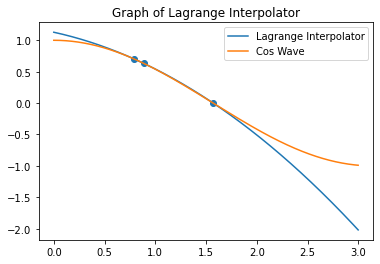

In [43]:
inputValues = [pi/4,pi/4+.1,pi/2]
outputValues = [math.cos(x) for x in inputValues]


import matplotlib.pyplot as plt
import numpy as np

x = np.arange( 0,3,.001)
plt.scatter(inputValues,outputValues)
plt.plot(x,lagrangeInterpolator(inputValues,outputValues,x))
plt.plot(x, np.cos(x))
plt.title('Graph of Lagrange Interpolator')
plt.legend(['Lagrange Interpolator', 'Cos Wave'])

plt.show()

In [56]:
actualValue = (1/sqrt2 + 0.2)
interpolator_value = lagrangeInterpolator(inputValues, outputValues, 1/sqrt2 +0.2)
second_actual_value = (-1/sqrt2+0.2)
second_interpolator_value = 2*outputValues[0]/((inputValues[0]-inputValues[1])*(inputValues[0]-inputValues[2]))+2*outputValues[1]/((inputValues[1]-inputValues[0])*(inputValues[1]-inputValues[2]))+2*outputValues[2]/((inputValues[2]-inputValues[0])*(inputValues[2]-inputValues[1]))

At the end of our project, we did the analysis of the interpolator and the derivative of it. The results are:

In [69]:
true_interpolator_error = true_error(interpolator_value, actualValue)
real__interpolator_error = relative_error(interpolator_value, actualValue)
true_secondInterpolator_error = true_error(second_interpolator_value, second_actual_value)
real_secondInterpolator_error = relative_error(second_interpolator_value, second_actual_value)

In [70]:
print("Absolute and relative error for the interpolation at (center + 0.2) are",true_interpolator_error, "and" ,real__interpolator_error, "respectively.")
print("Absolute and relative error for the second derivative of the interpolation at (center + 0.2) are " ,true_secondInterpolator_error, "and" ,real_secondInterpolator_error, "respectively")



Absolute and relative error for the interpolation at (center + 0.2) are -0.2908302533049554 and -0.32061302961987875 respectively.
Absolute and relative error for the second derivative of the interpolation at (center + 0.2) are  0.042963223308423615 and -0.08472224174935435 respectively
